In [2]:
import heapq

# Dimensions de la carte
N = 50  # Grille 50x50

# Déplacements possibles (haut, bas, gauche, droite)
DIRECTIONS = [(-1, 0), (1, 0), (0, -1), (0, 1)]

def dijkstra(grid, start, end):
    """ Trouve le chemin le plus court avec l'algorithme de Dijkstra sur une grille. """
    x_start, y_start = start
    x_end, y_end = end

    # Initialisation des distances
    distances = [[float('inf')] * N for _ in range(N)]
    distances[x_start][y_start] = 0

    # File de priorité (min-heap)
    heap = [(0, x_start, y_start)]  # (distance, x, y)
    predecessors = {}  # Pour reconstruire le chemin

    while heap:
        current_dist, x, y = heapq.heappop(heap)

        # Arrivé au drake
        if (x, y) == (x_end, y_end):
            break

        # Parcours des voisins valides
        for dx, dy in DIRECTIONS:
            nx, ny = x + dx, y + dy

            if 0 <= nx < N and 0 <= ny < N and grid[nx][ny] == 1:  # Vérification des obstacles
                new_dist = current_dist + 1  # Chaque case coûte 1

                if new_dist < distances[nx][ny]:
                    distances[nx][ny] = new_dist
                    heapq.heappush(heap, (new_dist, nx, ny))
                    predecessors[(nx, ny)] = (x, y)

    # Reconstruction du chemin
    path = []
    current = end
    while current in predecessors:
        path.append(current)
        current = predecessors[current]
    path.append(start)
    path.reverse()

    return path

# Exemple de carte (1 = accessible, 0 = obstacle)
grid = [[1] * N for _ in range(N)]  # Grille vide (toutes cases accessibles)

# Ajout d'obstacles (exemple)
for i in range(20, 30):  
    for j in range(10, 40):  
        grid[i][j] = 0  # Mur d'obstacles

# Position de Maître Yi (point jaune) et du Drake (point rouge)
start_pos = (5, 5)
end_pos = (45, 25)

# Exécution de Dijkstra
chemin = dijkstra(grid, start_pos, end_pos)

# Affichage du chemin trouvé
print("Chemin trouvé :", chemin)


Chemin trouvé : [(5, 5), (5, 6), (5, 7), (5, 8), (5, 9), (6, 9), (7, 9), (8, 9), (9, 9), (10, 9), (11, 9), (12, 9), (13, 9), (14, 9), (15, 9), (16, 9), (17, 9), (18, 9), (19, 9), (20, 9), (21, 9), (22, 9), (23, 9), (24, 9), (25, 9), (26, 9), (27, 9), (28, 9), (29, 9), (30, 9), (30, 10), (30, 11), (30, 12), (30, 13), (30, 14), (30, 15), (30, 16), (30, 17), (30, 18), (30, 19), (30, 20), (30, 21), (30, 22), (30, 23), (30, 24), (30, 25), (31, 25), (32, 25), (33, 25), (34, 25), (35, 25), (36, 25), (37, 25), (38, 25), (39, 25), (40, 25), (41, 25), (42, 25), (43, 25), (44, 25), (45, 25)]


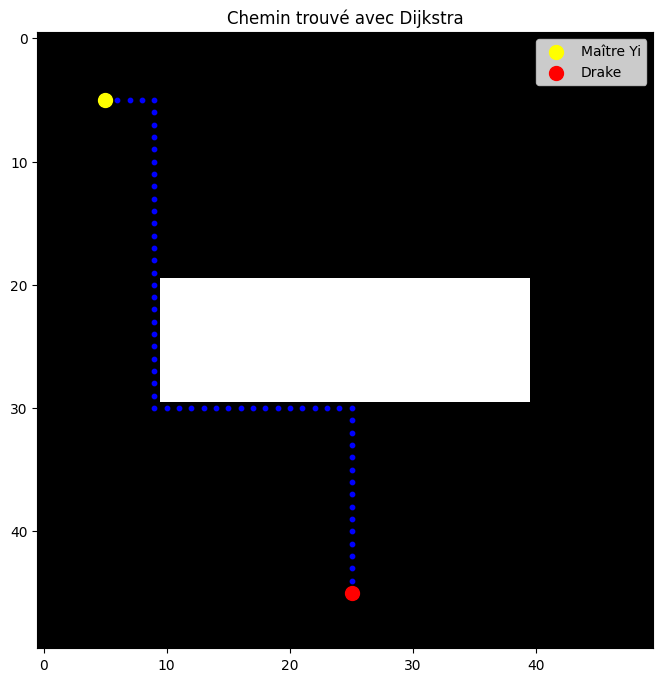

In [3]:
import heapq
import numpy as np
import matplotlib.pyplot as plt

# Dimensions de la carte
N = 50  # Grille 50x50
DIRECTIONS = [(-1, 0), (1, 0), (0, -1), (0, 1)]

def dijkstra(grid, start, end):
    """ Trouve le chemin le plus court avec Dijkstra sur une grille. """
    x_start, y_start = start
    x_end, y_end = end

    distances = [[float('inf')] * N for _ in range(N)]
    distances[x_start][y_start] = 0

    heap = [(0, x_start, y_start)]  # (distance, x, y)
    predecessors = {}

    while heap:
        current_dist, x, y = heapq.heappop(heap)

        if (x, y) == (x_end, y_end):
            break  # Arrêt quand on atteint le drake

        for dx, dy in DIRECTIONS:
            nx, ny = x + dx, y + dy
            if 0 <= nx < N and 0 <= ny < N and grid[nx][ny] == 1:  
                new_dist = current_dist + 1
                if new_dist < distances[nx][ny]:
                    distances[nx][ny] = new_dist
                    heapq.heappush(heap, (new_dist, nx, ny))
                    predecessors[(nx, ny)] = (x, y)

    # Reconstruction du chemin
    path = []
    current = end
    while current in predecessors:
        path.append(current)
        current = predecessors[current]
    path.append(start)
    path.reverse()

    return path

def afficher_grille(grid, path, start, end):
    """ Affiche la carte avec le chemin trouvé. """
    grid_display = np.array(grid)

    # Convertir en image (0 = noir, 1 = gris clair)
    plt.figure(figsize=(8, 8))
    plt.imshow(grid_display, cmap="gray_r")

    # Tracer le chemin en bleu
    for x, y in path:
        plt.scatter(y, x, color="blue", s=10)

    # Afficher Maître Yi (jaune) et le drake (rouge)
    plt.scatter(start[1], start[0], color="yellow", label="Maître Yi", s=100)
    plt.scatter(end[1], end[0], color="red", label="Drake", s=100)

    # Légende et affichage
    plt.legend()
    plt.title("Chemin trouvé avec Dijkstra")
    plt.show()

# Création de la carte (1 = accessible, 0 = obstacle)
grid = [[1] * N for _ in range(N)]

# Ajout d'obstacles (mur vertical au centre)
for i in range(20, 30):  
    for j in range(10, 40):  
        grid[i][j] = 0  

# Positions de Maître Yi et du Drake
start_pos = (5, 5)
end_pos = (45, 25)

# Exécution de Dijkstra
chemin = dijkstra(grid, start_pos, end_pos)

# Affichage visuel de la carte
afficher_grille(grid, chemin, start_pos, end_pos)


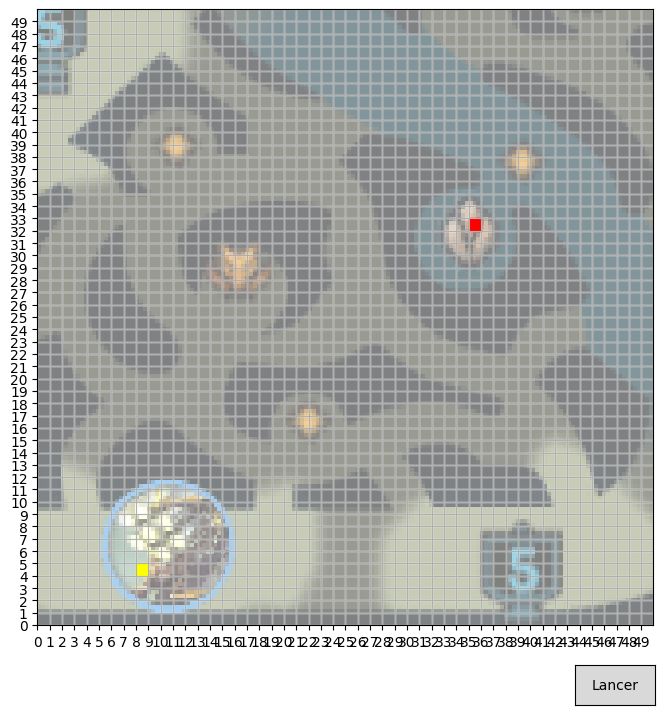

In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import heapq

grid_size = (50, 50)

# Coordonnées de départ et d'arrivée
start = (45, 8)  # Spawn
end = (17, 35)    # Drake

# Création de la grille (1 = accessible, 0 = obstacle)
grid = np.ones(grid_size)

minimap_image_path = "minimap.png"
try:
    minimap_img = mpimg.imread(minimap_image_path)
except FileNotFoundError:
    print(f"Erreur : l'image '{minimap_image_path}' est introuvable.")
    minimap_img = None

def interactive_display():
    fig, ax = plt.subplots(figsize=(8, 8))

    if minimap_img is not None:
        ax.imshow(minimap_img, extent=[0, grid.shape[1], 0, grid.shape[0]], origin='upper')

    def on_click(event):
        if event.inaxes == ax:
            x, y = int(event.ydata), int(event.xdata)
            x = grid.shape[0] - 1 - x  # Inverser l'axe Y pour correspondre à la grille
            if 0 <= x < grid.shape[0] and 0 <= y < grid.shape[1]:
                grid[x, y] = 0 if grid[x, y] == 1 else 1
                color = 'black' if grid[x, y] == 0 else 'white'
                ax.add_patch(plt.Rectangle((y, grid.shape[0] - 1 - x), 1, 1, color=color, alpha=0.5))
                fig.canvas.draw()

    for x in range(grid.shape[0]):
        for y in range(grid.shape[1]):
            color = 'white' if grid[x, y] == 1 else 'black'
            ax.add_patch(plt.Rectangle((y, grid.shape[0] - 1 - x), 1, 1, color=color, alpha=0.5))

    ax.add_patch(plt.Rectangle((start[1], grid.shape[0] - 1 - start[0]), 1, 1, color='yellow'))
    ax.add_patch(plt.Rectangle((end[1], grid.shape[0] - 1 - end[0]), 1, 1, color='red'))

    ax.set_xlim(0, grid.shape[1])
    ax.set_ylim(0, grid.shape[0])
    ax.set_aspect('equal')
    ax.set_xticks(range(grid.shape[1]))
    ax.set_yticks(range(grid.shape[0]))
    ax.grid(True)

    fig.canvas.mpl_connect('button_press_event', on_click)

    from matplotlib.widgets import Button

    def run_dijkstra(event):
        visited_nodes, optimal_path = dijkstra(grid, start, end)
        display_grid(grid, path=optimal_path, visited=visited_nodes)

    ax_button = plt.axes([0.8, 0.01, 0.1, 0.05])
    button = Button(ax_button, 'Lancer')
    button.on_clicked(run_dijkstra)

    plt.show()

def display_grid(grid, path=None, visited=None):
    plt.figure(figsize=(8, 8))

    if minimap_img is not None:
        plt.imshow(minimap_img, extent=[0, grid.shape[1], 0, grid.shape[0]], origin='upper')

    for x in range(grid.shape[0]):
        for y in range(grid.shape[1]):
            color = 'white' if grid[x, y] == 1 else 'black'
            plt.gca().add_patch(plt.Rectangle((y, grid.shape[0] - 1 - x), 1, 1, color=color, alpha=0.5))

    if visited is not None:
        for node in visited:
            plt.gca().add_patch(plt.Rectangle((node[1], grid.shape[0] - 1 - node[0]), 1, 1, color='blue', alpha=0.3))

    if path is not None:
        for node in path:
            plt.gca().add_patch(plt.Rectangle((node[1], grid.shape[0] - 1 - node[0]), 1, 1, color='green', alpha=0.5))

    plt.gca().add_patch(plt.Rectangle((start[1], grid.shape[0] - 1 - start[0]), 1, 1, color='yellow'))
    plt.gca().add_patch(plt.Rectangle((end[1], grid.shape[0] - 1 - end[0]), 1, 1, color='red'))

    plt.xlim(0, grid.shape[1])
    plt.ylim(0, grid.shape[0])
    plt.gca().set_aspect('equal')
    plt.xticks(range(grid.shape[1]))
    plt.yticks(range(grid.shape[0]))
    plt.grid(True)
    plt.show()

def dijkstra(grid, start, end):
    """
    Implémentez ici l'algorithme de Dijkstra.
    - grid : matrice numpy représentant la grille (1 = accessible, 0 = obstacle).
    - start : tuple (x, y) représentant le point de départ.
    - end : tuple (x, y) représentant le point d'arrivée.
    Retour :
        - Une liste des nœuds visités.
        - Une liste du chemin optimal.
    """
    visited = []  # Liste des nœuds visités (pour visualisation)
    path = []     # Chemin optimal (si trouvé)

    # Initialisation
    start_x, start_y = start
    end_x, end_y = end

    # Initialisation des distances
    distances = np.full(grid.shape, np.inf)
    distances[start_x, start_y] = 0

    # Initialisation de la file de priorité
    heap = [(0, start_x, start_y)]  # (distance, x, y)
    predecessors = {}  # Pour retracer le chemin

    while heap:
        current_dist, x, y = heapq.heappop(heap)

        # Arrivée au drake
        if (x, y) == (end_x, end_y):
            break

        # Parcours des voisins
        for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
            nx, ny = x + dx, y + dy

            if 0 <= nx < grid.shape[0] and 0 <= ny < grid.shape[1] and grid[nx, ny] == 1:  # Accessible
                new_dist = current_dist + 1  # Chaque case a un coût de 1

                if new_dist < distances[nx, ny]:
                    distances[nx, ny] = new_dist
                    heapq.heappush(heap, (new_dist, nx, ny))
                    predecessors[(nx, ny)] = (x, y)
                    visited.append((nx, ny))  # Ajouter à la liste des visites

    # Reconstruction du chemin
    current = end
    while current in predecessors:
        path.append(current)
        current = predecessors[current]
    path.append(start)
    path.reverse()

    return visited, path

interactive_display()


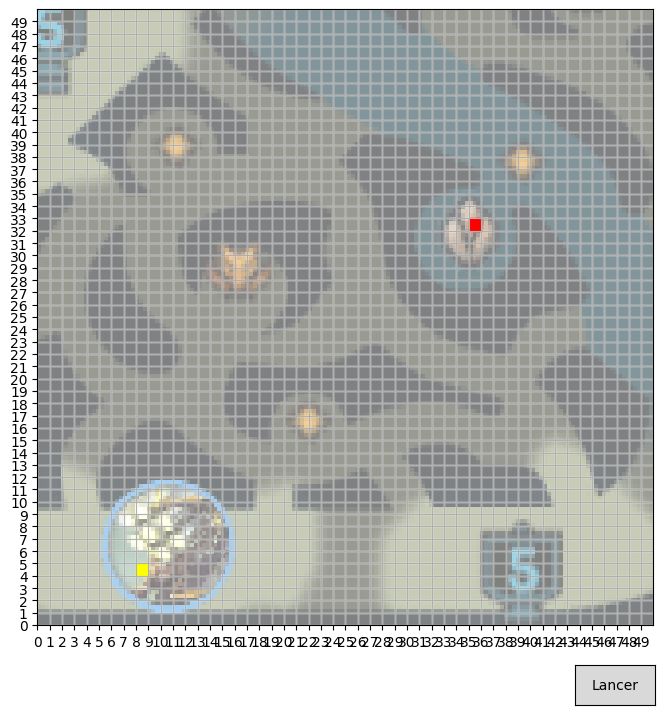

In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import heapq

grid_size = (50, 50)

# Coordonnées de départ et d'arrivée
start = (45, 8)  # Spawn
end = (17, 35)    # Drake

# Création de la grille (1 = accessible, 0 = obstacle)
grid = np.ones(grid_size)

minimap_image_path = "minimap (1).png"
try:
    minimap_img = mpimg.imread(minimap_image_path)
except FileNotFoundError:
    print(f"Erreur : l'image '{minimap_image_path}' est introuvable.")
    minimap_img = None

def interactive_display():
    fig, ax = plt.subplots(figsize=(8, 8))

    if minimap_img is not None:
        ax.imshow(minimap_img, extent=[0, grid.shape[1], 0, grid.shape[0]], origin='upper')

    def on_click(event):
        if event.inaxes == ax:
            x, y = int(event.ydata), int(event.xdata)
            x = grid.shape[0] - 1 - x  # Inverser l'axe Y pour correspondre à la grille
            if 0 <= x < grid.shape[0] and 0 <= y < grid.shape[1]:
                grid[x, y] = 0 if grid[x, y] == 1 else 1
                color = 'black' if grid[x, y] == 0 else 'white'
                ax.add_patch(plt.Rectangle((y, grid.shape[0] - 1 - x), 1, 1, color=color, alpha=0.5))
                fig.canvas.draw()

    for x in range(grid.shape[0]):
        for y in range(grid.shape[1]):
            color = 'white' if grid[x, y] == 1 else 'black'
            ax.add_patch(plt.Rectangle((y, grid.shape[0] - 1 - x), 1, 1, color=color, alpha=0.5))

    ax.add_patch(plt.Rectangle((start[1], grid.shape[0] - 1 - start[0]), 1, 1, color='yellow'))
    ax.add_patch(plt.Rectangle((end[1], grid.shape[0] - 1 - end[0]), 1, 1, color='red'))

    ax.set_xlim(0, grid.shape[1])
    ax.set_ylim(0, grid.shape[0])
    ax.set_aspect('equal')
    ax.set_xticks(range(grid.shape[1]))
    ax.set_yticks(range(grid.shape[0]))
    ax.grid(True)

    fig.canvas.mpl_connect('button_press_event', on_click)

    from matplotlib.widgets import Button

    def run_dijkstra(event):
        visited_nodes, optimal_path = dijkstra(grid, start, end)
        display_grid(grid, path=optimal_path, visited=visited_nodes)

    ax_button = plt.axes([0.8, 0.01, 0.1, 0.05])
    button = Button(ax_button, 'Lancer')
    button.on_clicked(run_dijkstra)

    plt.show()

def display_grid(grid, path=None, visited=None):
    plt.figure(figsize=(8, 8))

    if minimap_img is not None:
        plt.imshow(minimap_img, extent=[0, grid.shape[1], 0, grid.shape[0]], origin='upper')

    for x in range(grid.shape[0]):
        for y in range(grid.shape[1]):
            color = 'white' if grid[x, y] == 1 else 'black'
            plt.gca().add_patch(plt.Rectangle((y, grid.shape[0] - 1 - x), 1, 1, color=color, alpha=0.5))

    if visited is not None:
        for node in visited:
            plt.gca().add_patch(plt.Rectangle((node[1], grid.shape[0] - 1 - node[0]), 1, 1, color='blue', alpha=0.3))

    if path is not None:
        for node in path:
            plt.gca().add_patch(plt.Rectangle((node[1], grid.shape[0] - 1 - node[0]), 1, 1, color='green', alpha=0.5))

    plt.gca().add_patch(plt.Rectangle((start[1], grid.shape[0] - 1 - start[0]), 1, 1, color='yellow'))
    plt.gca().add_patch(plt.Rectangle((end[1], grid.shape[0] - 1 - end[0]), 1, 1, color='red'))

    plt.xlim(0, grid.shape[1])
    plt.ylim(0, grid.shape[0])
    plt.gca().set_aspect('equal')
    plt.xticks(range(grid.shape[1]))
    plt.yticks(range(grid.shape[0]))
    plt.grid(True)
    plt.show()

def dijkstra(grid, start, end):

    visited = []  # Liste des nœuds visités (pour visualisation)
    path = []     # Chemin optimal (si trouvé)

    # Initialisation
    start_x, start_y = start
    end_x, end_y = end

    # Initialisation des distances
    distances = np.full(grid.shape, np.inf)
    distances[start_x, start_y] = 0

    # Initialisation de la file de priorité
    heap = [(0, start_x, start_y)]  # (distance, x, y)
    predecessors = {}  # Pour retracer le chemin

    while heap:
        current_dist, x, y = heapq.heappop(heap)

        # Si ce nœud a déjà été visité, on passe au suivant
        if (x, y) in visited:
            continue

        # Marquer le nœud comme visité
        visited.append((x, y))

        # Arrivée au drake
        if (x, y) == (end_x, end_y):
            break

        # Parcours des voisins
        for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
            nx, ny = x + dx, y + dy

            # Vérification que le voisin est dans les limites de la grille et accessible
            if 0 <= nx < grid.shape[0] and 0 <= ny < grid.shape[1] and grid[nx, ny] == 1:
                new_dist = current_dist + 1  # Chaque déplacement coûte 1

                if new_dist < distances[nx, ny]:
                    distances[nx, ny] = new_dist
                    heapq.heappush(heap, (new_dist, nx, ny))
                    predecessors[(nx, ny)] = (x, y)

    # Reconstruction du chemin
    current = end
    while current in predecessors:
        path.append(current)
        current = predecessors[current]
    path.append(start)
    path.reverse()

    return visited, path
interactive_display()



In [8]:
# Si vous avez un probleme avec les biblioteques :  
# pip install matplotlib
# pip install numpy 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import heapq

grid_size = (50, 50)

# Coordonnées de départ et d'arrivée
start = (45, 8)  # Spawn
end = (17, 35)    # Drake

# Création de la grille (1 = accessible, 0 = obstacle)
grid = np.ones(grid_size)

minimap_image_path = "minimap.png"
try:
    minimap_img = mpimg.imread(minimap_image_path)
except FileNotFoundError:
    print(f"Erreur : l'image '{minimap_image_path}' est introuvable.")
    minimap_img = None

def interactive_display():
    fig, ax = plt.subplots(figsize=(8, 8))

    if minimap_img is not None:
        ax.imshow(minimap_img, extent=[0, grid.shape[1], 0, grid.shape[0]], origin='upper')

    def on_click(event):
        if event.inaxes == ax:
            x, y = int(event.ydata), int(event.xdata)
            x = grid.shape[0] - 1 - x  # Inverser l'axe Y pour correspondre à la grille
            if 0 <= x < grid.shape[0] and 0 <= y < grid.shape[1]:
                grid[x, y] = 0 if grid[x, y] == 1 else 1
                color = 'black' if grid[x, y] == 0 else 'white'
                ax.add_patch(plt.Rectangle((y, grid.shape[0] - 1 - x), 1, 1, color=color, alpha=0.5))
                fig.canvas.draw()

    for x in range(grid.shape[0]):
        for y in range(grid.shape[1]):
            color = 'white' if grid[x, y] == 1 else 'black'
            ax.add_patch(plt.Rectangle((y, grid.shape[0] - 1 - x), 1, 1, color=color, alpha=0.5))

    ax.add_patch(plt.Rectangle((start[1], grid.shape[0] - 1 - start[0]), 1, 1, color='yellow'))
    ax.add_patch(plt.Rectangle((end[1], grid.shape[0] - 1 - end[0]), 1, 1, color='red'))

    ax.set_xlim(0, grid.shape[1])
    ax.set_ylim(0, grid.shape[0])
    ax.set_aspect('equal')
    ax.set_xticks(range(grid.shape[1]))
    ax.set_yticks(range(grid.shape[0]))
    ax.grid(True)

    fig.canvas.mpl_connect('button_press_event', on_click)

    from matplotlib.widgets import Button

    def run_dijkstra(event):
        visited_nodes, optimal_path = dijkstra(grid, start, end)
        display_grid(grid, path=optimal_path, visited=visited_nodes)

    ax_button = plt.axes([0.8, 0.01, 0.1, 0.05])
    button = Button(ax_button, 'Lancer')
    button.on_clicked(run_dijkstra)

    plt.show()

def display_grid(grid, path=None, visited=None):
    plt.figure(figsize=(8, 8))

    if minimap_img is not None:
        plt.imshow(minimap_img, extent=[0, grid.shape[1], 0, grid.shape[0]], origin='upper')

    for x in range(grid.shape[0]):
        for y in range(grid.shape[1]):
            color = 'white' if grid[x, y] == 1 else 'black'
            plt.gca().add_patch(plt.Rectangle((y, grid.shape[0] - 1 - x), 1, 1, color=color, alpha=0.5))

    if visited is not None:
        for node in visited:
            plt.gca().add_patch(plt.Rectangle((node[1], grid.shape[0] - 1 - node[0]), 1, 1, color='blue', alpha=0.3))

    if path is not None:
        for node in path:
            plt.gca().add_patch(plt.Rectangle((node[1], grid.shape[0] - 1 - node[0]), 1, 1, color='green', alpha=0.5))

    plt.gca().add_patch(plt.Rectangle((start[1], grid.shape[0] - 1 - start[0]), 1, 1, color='yellow'))
    plt.gca().add_patch(plt.Rectangle((end[1], grid.shape[0] - 1 - end[0]), 1, 1, color='red'))

    plt.xlim(0, grid.shape[1])
    plt.ylim(0, grid.shape[0])
    plt.gca().set_aspect('equal')
    plt.xticks(range(grid.shape[1]))
    plt.yticks(range(grid.shape[0]))
    plt.grid(True)
    plt.show()

def dijkstra(grid, start, end):
    visited = []  # Liste des nœuds visités (pour visualisation)
    path = []     # Chemin optimal (si trouvé)

    # Initialisation
    start_x, start_y = start
    end_x, end_y = end

    # Initialisation des distances
    distances = np.full(grid.shape, np.inf)
    distances[start_x, start_y] = 0

    # Initialisation de la file de priorité
    heap = [(0, start_x, start_y)]  # (distance, x, y)
    predecessors = {}  # Pour retracer le chemin

    while heap:
        current_dist, x, y = heapq.heappop(heap)

        # Si ce nœud a déjà été visité, on passe au suivant
        if (x, y) in visited:
            continue

        # Marquer le nœud comme visité
        visited.append((x, y))

        # Arrivée au drake
        if (x, y) == (end_x, end_y):
            break

        # Parcours des voisins
        for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
            nx, ny = x + dx, y + dy

            # Vérification que le voisin est dans les limites de la grille et accessible
            if 0 <= nx < grid.shape[0] and 0 <= ny < grid.shape[1] and grid[nx, ny] == 1:
                new_dist = current_dist + 1  # Chaque déplacement coûte 1

                if new_dist < distances[nx, ny]:
                    distances[nx, ny] = new_dist
                    heapq.heappush(heap, (new_dist, nx, ny))
                    predecessors[(nx, ny)] = (x, y)

    # Reconstruction du chemin
    current = end
    while current in predecessors:
        path.append(current)
        current = predecessors[current]
    path.append(start)
    path.reverse()

    return visited, path
   

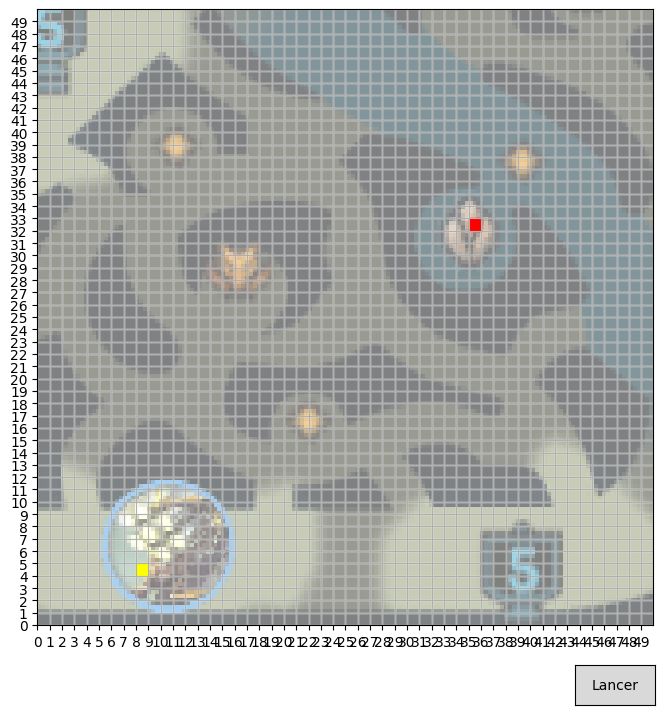

In [9]:
interactive_display()

In [10]:
import heapq
import numpy as np

def dijkstra(grid, start, end):
    """
    Implémente l'algorithme de Dijkstra pour trouver le chemin le plus court entre
    deux points sur une grille avec obstacles.
    
    - grid : matrice numpy représentant la grille (1 = accessible, 0 = obstacle).
    - start : tuple (x, y) représentant le point de départ.
    - end : tuple (x, y) représentant le point d'arrivée.
    
    Retour :
        - visited : une liste des nœuds visités (pour visualisation).
        - path : une liste du chemin optimal (si trouvé).
    """
    visited = []  # Liste des nœuds visités (pour visualisation)
    path = []     # Chemin optimal (si trouvé)

    # Initialisation
    start_x, start_y = start
    end_x, end_y = end

    # Initialisation des distances à l'infini, sauf pour le point de départ
    distances = np.full(grid.shape, np.inf)
    distances[start_x, start_y] = 0

    # Initialisation de la file de priorité (min-heap)
    heap = [(0, start_x, start_y)]  # (distance, x, y)
    predecessors = {}  # Pour retracer le chemin

    # Parcours des nœuds avec la file de priorité
    while heap:
        current_dist, x, y = heapq.heappop(heap)

        # Si ce nœud a déjà été visité, on passe au suivant
        if (x, y) in visited:
            continue

        # Marquer le nœud comme visité
        visited.append((x, y))

        # Si on atteint le point d'arrivée, on arrête l'algorithme
        if (x, y) == (end_x, end_y):
            break

        # Parcours des voisins (haut, bas, gauche, droite)
        for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
            nx, ny = x + dx, y + dy

            # Vérification que le voisin est dans les limites de la grille et accessible
            if 0 <= nx < grid.shape[0] and 0 <= ny < grid.shape[1] and grid[nx, ny] == 1:
                new_dist = current_dist + 1  # Chaque déplacement coûte 1

                # Si une meilleure distance est trouvée, mettre à jour
                if new_dist < distances[nx, ny]:
                    distances[nx, ny] = new_dist
                    heapq.heappush(heap, (new_dist, nx, ny))
                    predecessors[(nx, ny)] = (x, y)

    # Reconstruction du chemin à partir du prédécesseur
    current = end
    while current in predecessors:
        path.append(current)
        current = predecessors[current]
    path.append(start)
    path.reverse()

    return visited, path
